In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/House%20Prices%20-%20Advanced%20Regression%20Techniques/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<AxesSubplot:>

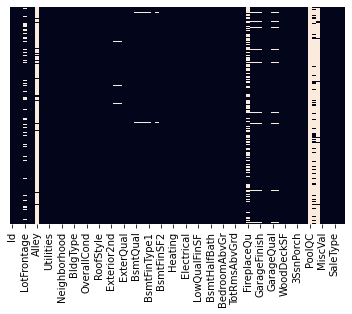

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [7]:
df.drop("Alley",axis=1,inplace=True)
df["LotFrontage"]=df["LotFrontage"].fillna(df["LotFrontage"]).mean()
df["BsmtCond"]=df["BsmtCond"].fillna(df["BsmtCond"].mode()[0])
df["BsmtQual"]=df["BsmtQual"].fillna(df["BsmtQual"].mode()[0])
df["FireplaceQu"]=df["FireplaceQu"].fillna(df["FireplaceQu"].mode()[0])
df["GarageType"]=df["GarageType"].fillna(df["GarageType"].mode()[0])
df.drop(["GarageYrBlt"],axis=1,inplace=True)
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df.drop(["PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

In [8]:
df.shape

(1460, 76)

In [9]:
df.drop(["Id"],axis=1,inplace=True)
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

<AxesSubplot:>

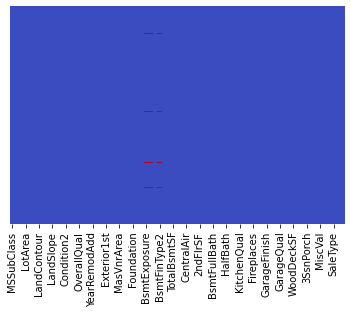

In [10]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="coolwarm")

<AxesSubplot:>

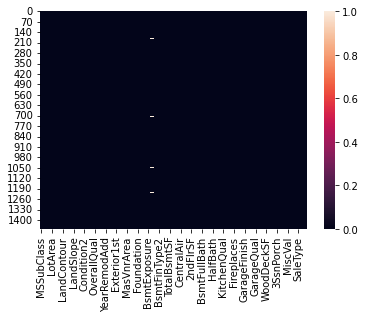

In [11]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
sns.heatmap(df.isnull())

In [12]:
df.dropna(inplace=True)
df.shape

(1422, 75)

In [13]:
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,70.049958,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,70.049958,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500


In [14]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']
len(columns)

39

In [15]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final
main_df=df.copy()

In [16]:
test_df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/House%20Prices%20-%20Advanced%20Regression%20Techniques/test.csv")

In [17]:
test_df.shape

(1459, 80)

<AxesSubplot:>

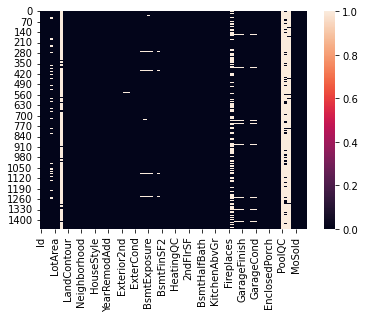

In [18]:
sns.heatmap(test_df.isnull())

<AxesSubplot:>

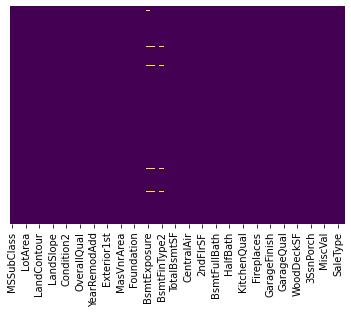

In [19]:
test_df['LotFrontage']=test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())
test_df['MSZoning']=test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])
test_df.drop(['Alley'],axis=1,inplace=True)
test_df['BsmtCond']=test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtQual']=test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['FireplaceQu']=test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])
test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df.drop(['GarageYrBlt'],axis=1,inplace=True)
test_df['GarageFinish']=test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])

test_df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

test_df.drop(['Id'],axis=1,inplace=True)
test_df['MasVnrType']=test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mode()[0])
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
test_df['BsmtExposure']=test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])
test_df['Utilities']=test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st']=test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd']=test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2']=test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF']=test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0])
test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0])
test_df['KitchenQual']=test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional']=test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['GarageCars']=test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea']=test_df['GarageArea'].fillna(test_df['GarageArea'].mean())
test_df['SaleType']=test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])
test_df.shape

(1459, 74)

In [21]:
final_df=pd.concat([df,test_df],axis=0)
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [22]:
final_df.shape

(2881, 235)

In [23]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]
final_df.shape

(2881, 175)

In [24]:
train=final_df.iloc[:1422,:]
test=final_df.iloc[1422:,:]
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,70.049958,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,70.049958,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,70.049958,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,70.049958,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,70.049958,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [25]:
test.drop(["SalePrice"],axis=1,inplace=True)

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
xtrain=train.drop(["SalePrice"],axis=1)
ytrain=train["SalePrice"]
import xgboost
cls=xgboost.XGBRegressor()
reg=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=reg,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
random_cv.fit(xtrain,ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
